<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
# Identify missing values in critical columns
critical_columns = ['Employment', 'JobSat', 'RemoteWork']

print("Missing values in critical columns:")
for col in critical_columns:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        missing_percentage = (missing_count / len(df)) * 100
        print(f"{col}: {missing_count} ({missing_percentage:.2f}%)")

print("\n" + "="*60 + "\n")

# Strategy 1: Fill Employment with mode (most frequent value)
if 'Employment' in df.columns:
    employment_mode = df['Employment'].mode()[0]
    df['Employment'].fillna(employment_mode, inplace=True)
    print(f"Filled 'Employment' missing values with: {employment_mode}")

# Strategy 2: Fill JobSat with median
if 'JobSat' in df.columns:
    jobsat_median = df['JobSat'].median()
    df['JobSat'].fillna(jobsat_median, inplace=True)
    print(f"Filled 'JobSat' missing values with median: {jobsat_median}")

# Strategy 3: Fill RemoteWork with mode
if 'RemoteWork' in df.columns:
    remotework_mode = df['RemoteWork'].mode()[0]
    df['RemoteWork'].fillna(remotework_mode, inplace=True)
    print(f"Filled 'RemoteWork' missing values with: {remotework_mode}")

print("\n" + "="*60 + "\n")

# Verify missing values after filling
print("Missing values after handling:")
for col in critical_columns:
    if col in df.columns:
        print(f"{col}: {df[col].isnull().sum()}")

Missing values in critical columns:
Employment: 0 (0.00%)
JobSat: 36311 (55.49%)
RemoteWork: 10631 (16.25%)


Filled 'Employment' missing values with: Employed, full-time
Filled 'JobSat' missing values with median: 7.0
Filled 'RemoteWork' missing values with: Hybrid (some remote, some in-person)


Missing values after handling:
Employment: 0
JobSat: 0
RemoteWork: 0


/tmp/ipykernel_1257/3894380485.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(employment_mode, inplace=True)
/tmp/ipykernel_1257/3894380485.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


Median Job Satisfaction by Experience Range:
ExperienceRange
0-5        7.0
10-20      7.0
5-10       7.0
>20        7.0
Unknown    7.0
Name: JobSat, dtype: float64




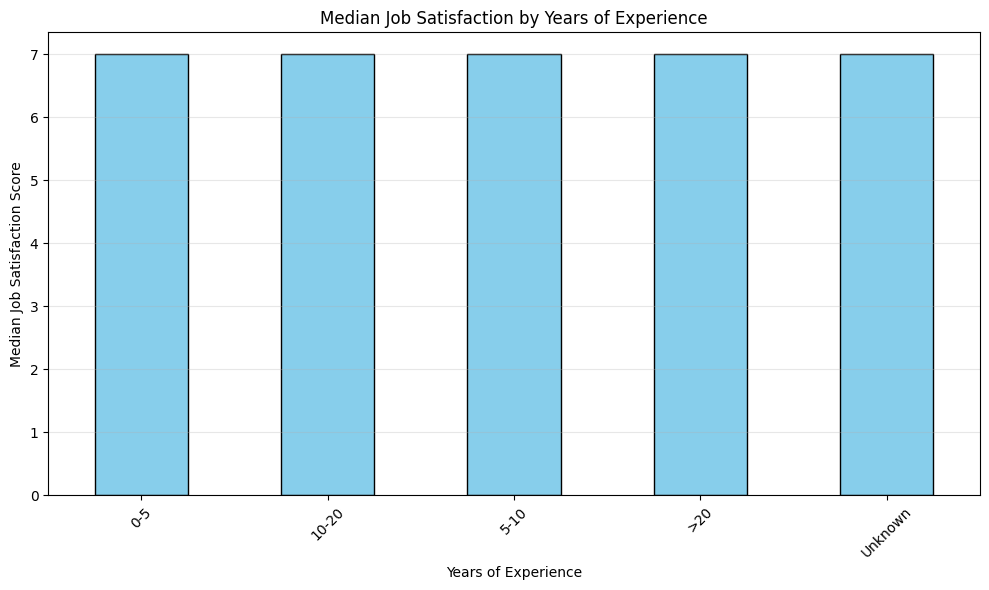

In [4]:
# Create experience ranges for YearsCodePro
if 'YearsCodePro' in df.columns and 'JobSat' in df.columns:
    # Convert YearsCodePro to numeric
    df['YearsCodePro_Numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
    
    # Create experience ranges
    def categorize_experience(years):
        if pd.isna(years):
            return 'Unknown'
        elif years <= 5:
            return '0-5'
        elif years <= 10:
            return '5-10'
        elif years <= 20:
            return '10-20'
        else:
            return '>20'
    
    df['ExperienceRange'] = df['YearsCodePro_Numeric'].apply(categorize_experience)
    
    # Calculate median JobSat for each range
    print("Median Job Satisfaction by Experience Range:")
    median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median().sort_index()
    print(median_satisfaction)
    
    print("\n" + "="*60 + "\n")
    
    # Visualize the relationship using a bar plot
    plt.figure(figsize=(10, 6))
    median_satisfaction.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Median Job Satisfaction by Years of Experience')
    plt.xlabel('Years of Experience')
    plt.ylabel('Median Job Satisfaction Score')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


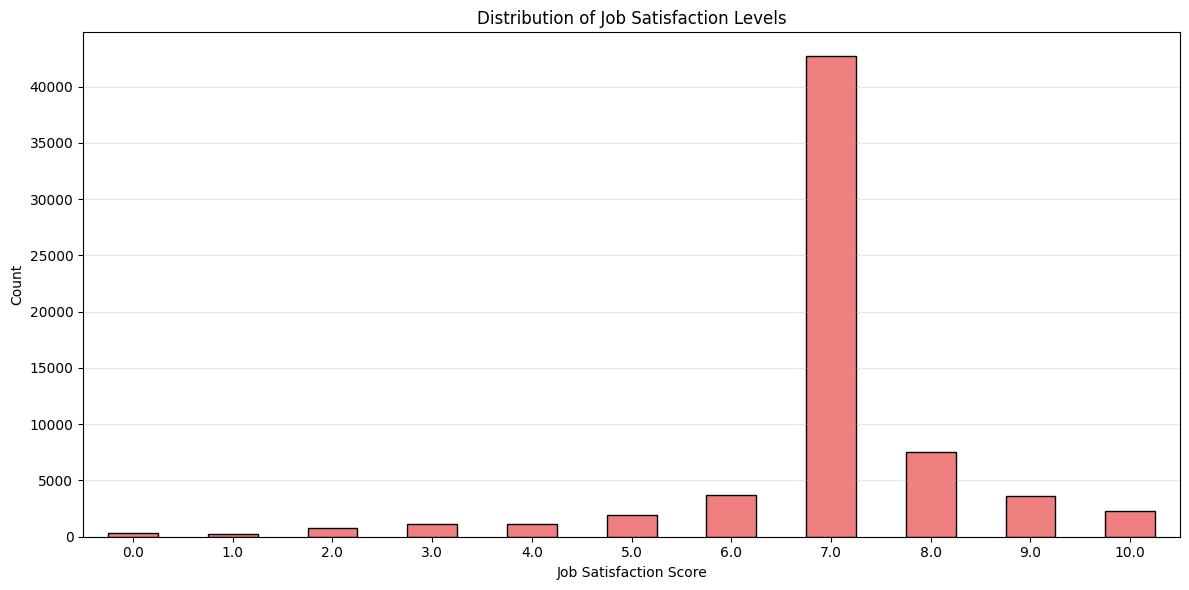


Job Satisfaction Statistics:
count    65437.000000
mean         6.971087
std          1.393560
min          0.000000
25%          7.000000
50%          7.000000
75%          7.000000
max         10.000000
Name: JobSat, dtype: float64


In [5]:
# Use a count plot to show the distribution of JobSat values
if 'JobSat' in df.columns:
    plt.figure(figsize=(12, 6))
    
    # Count plot for JobSat
    jobsat_counts = df['JobSat'].value_counts().sort_index()
    jobsat_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
    
    plt.title('Distribution of Job Satisfaction Levels')
    plt.xlabel('Job Satisfaction Score')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nJob Satisfaction Statistics:")
    print(df['JobSat'].describe())

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


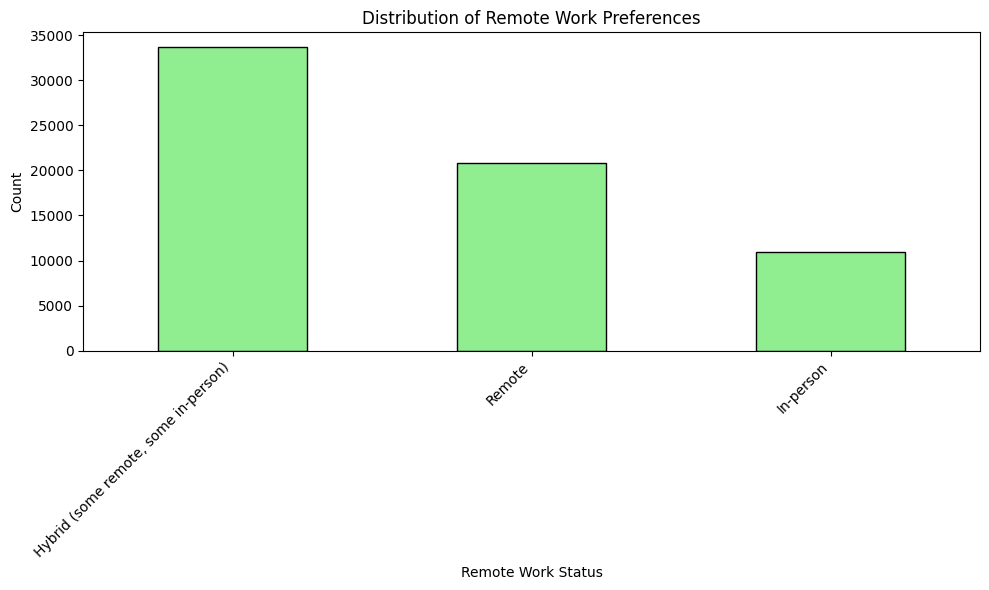



Remote Work Preferences by Employment Type:
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17296   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Retired                                          2   
Student, part-time                                                                   494   
Student, part-time;Employed, part-

/tmp/ipykernel_1257/1736161070.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

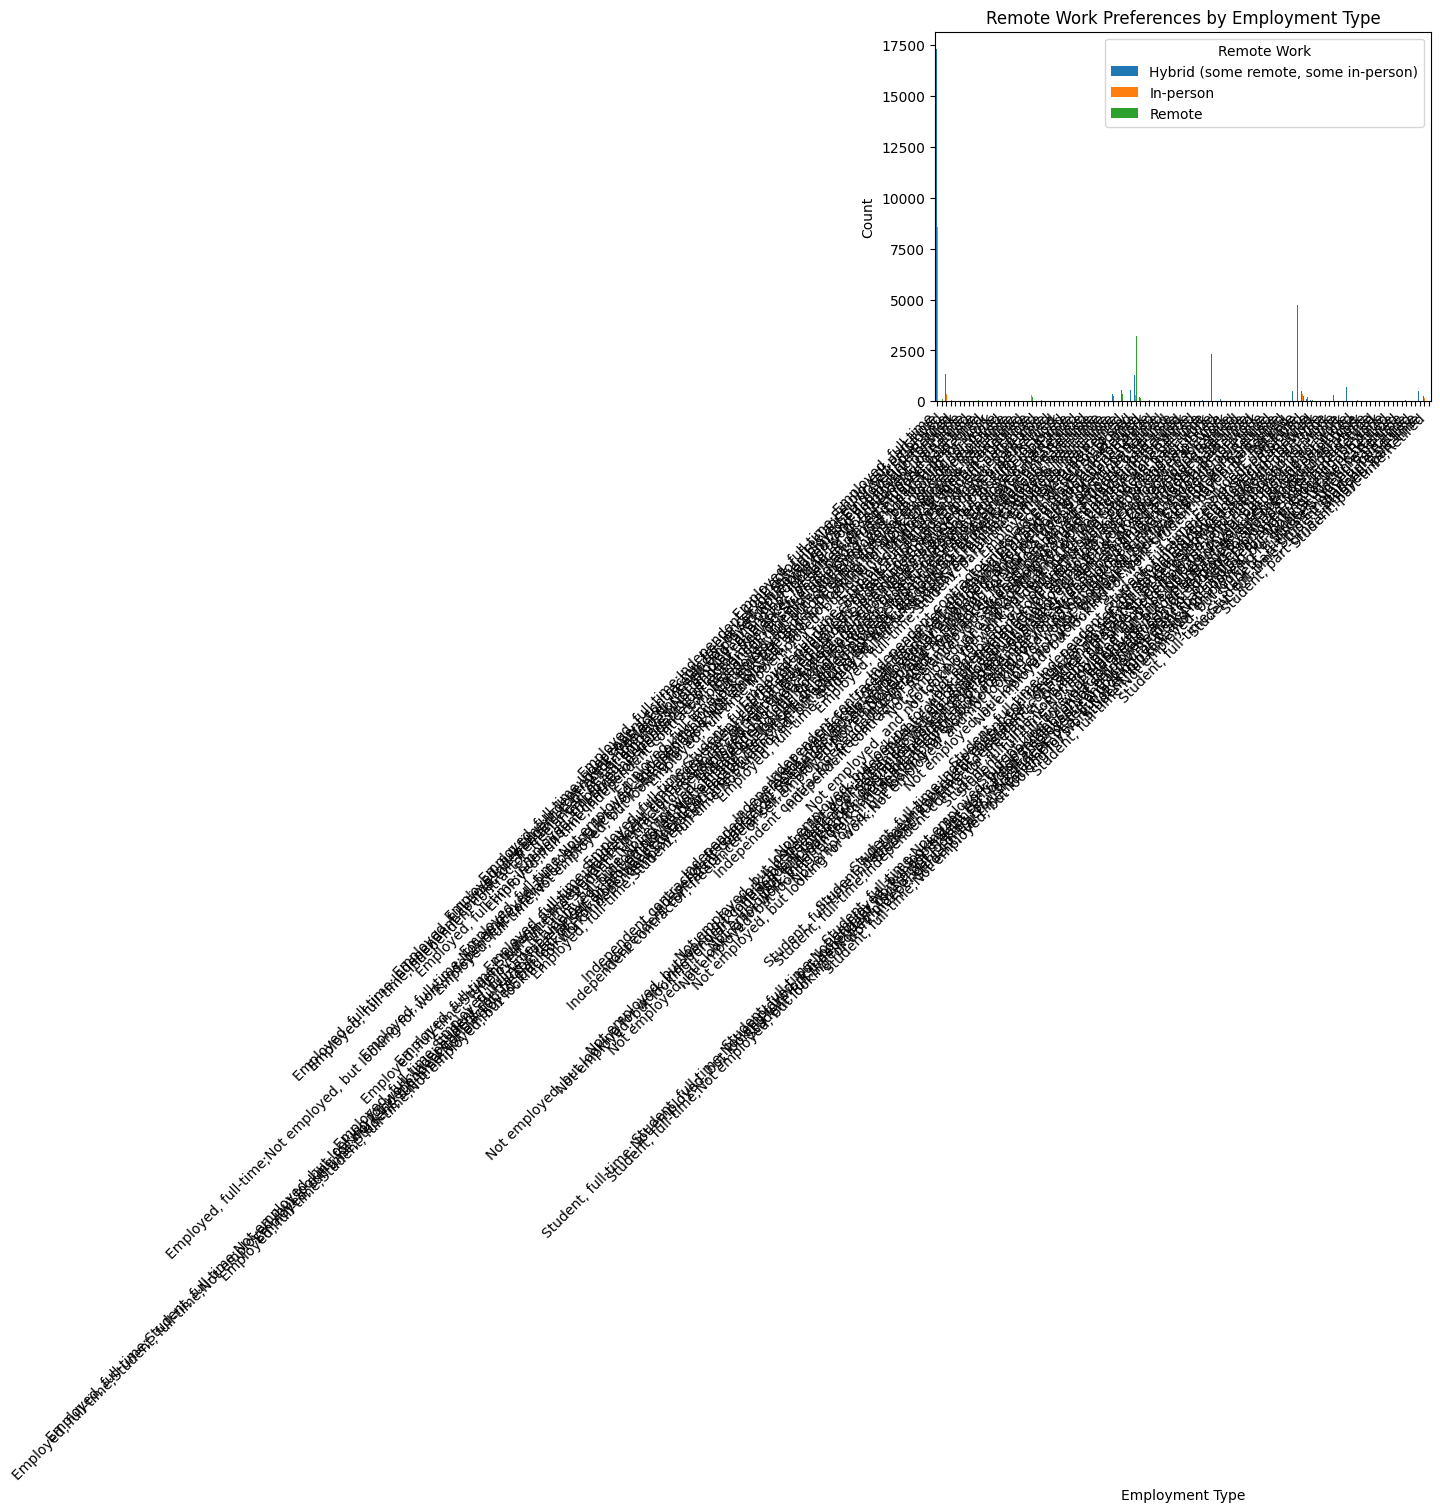

In [6]:
# Analyze trends in remote work based on job roles
if 'RemoteWork' in df.columns and 'Employment' in df.columns:
    # Count plot to show remote work distribution
    plt.figure(figsize=(10, 6))
    df['RemoteWork'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title('Distribution of Remote Work Preferences')
    plt.xlabel('Remote Work Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*60 + "\n")
    
    # Cross-tabulate remote work preferences by employment type
    print("Remote Work Preferences by Employment Type:")
    remote_employment_crosstab = pd.crosstab(df['Employment'], df['RemoteWork'], margins=True)
    print(remote_employment_crosstab)
    
    print("\n" + "="*60 + "\n")
    
    # Visualize with a grouped bar chart
    remote_employment_crosstab_no_margins = pd.crosstab(df['Employment'], df['RemoteWork'])
    plt.figure(figsize=(12, 6))
    remote_employment_crosstab_no_margins.plot(kind='bar', stacked=False)
    plt.title('Remote Work Preferences by Employment Type')
    plt.xlabel('Employment Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Remote Work')
    plt.tight_layout()
    plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


Analyzing top 5 countries:
['United States of America', 'Germany', 'India', 'United Kingdom of Great Britain and Northern Ireland', 'Ukraine']


Sample of LanguageHaveWorkedWith data:
0                                                  NaN
1    Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                   C#
3    C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4              C++;HTML/CSS;JavaScript;Lua;Python;Rust
Name: LanguageHaveWorkedWith, dtype: object


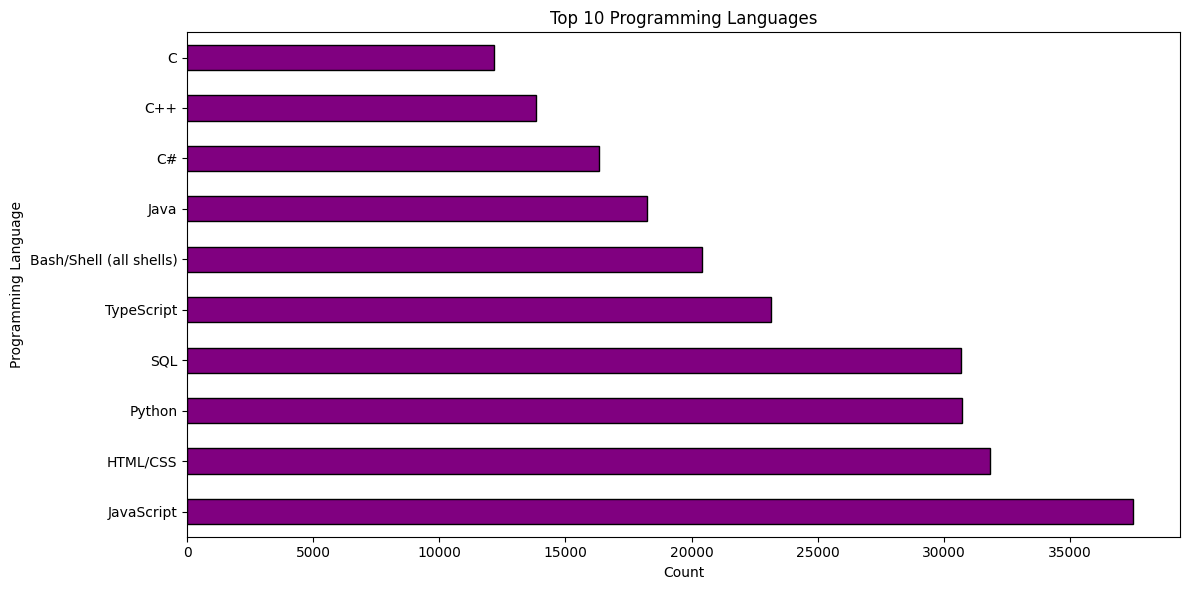

In [7]:
# Analyze the popularity of programming languages by region
if 'LanguageHaveWorkedWith' in df.columns and 'Country' in df.columns:
    # Filter data by country or region (example: top 5 countries)
    top_countries = df['Country'].value_counts().head(5).index
    df_top_countries = df[df['Country'].isin(top_countries)]
    
    print(f"Analyzing top {len(top_countries)} countries:")
    print(list(top_countries))
    
    print("\n" + "="*60 + "\n")
    
    # Count programming languages mentioned (assuming semi-colon separated)
    # This is a simplified example
    print("Sample of LanguageHaveWorkedWith data:")
    print(df['LanguageHaveWorkedWith'].head())
    
    # Visualize top programming languages by region with a bar plot
    # Note: This requires parsing the language list which may be complex
    # Here's a simple visualization of language frequency
    
    # Split languages and count (assuming semicolon-separated)
    all_languages = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode()
    language_counts = all_languages.value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    language_counts.plot(kind='barh', color='purple', edgecolor='black')
    plt.title('Top 10 Programming Languages')
    plt.xlabel('Count')
    plt.ylabel('Programming Language')
    plt.tight_layout()
    plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


Correlation between Years of Experience and Job Satisfaction: 0.0735




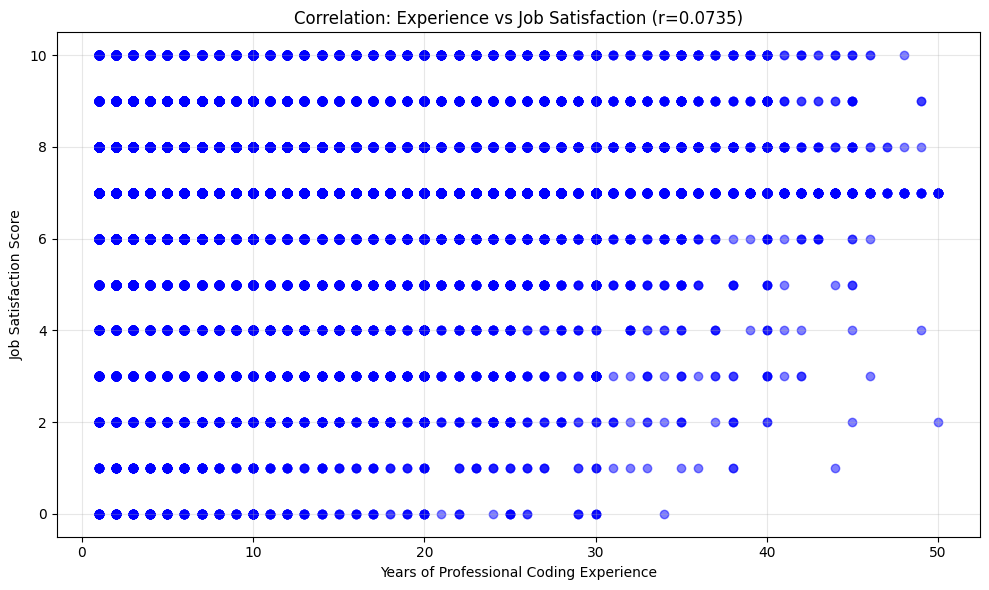

In [8]:
# Examine correlation between YearsCodePro and JobSatPoints_1
if 'YearsCodePro_Numeric' in df.columns and 'JobSat' in df.columns:
    # Remove missing values for correlation
    correlation_data = df[['YearsCodePro_Numeric', 'JobSat']].dropna()
    
    # Calculate correlation
    correlation = correlation_data['YearsCodePro_Numeric'].corr(correlation_data['JobSat'])
    print(f"Correlation between Years of Experience and Job Satisfaction: {correlation:.4f}")
    
    print("\n" + "="*60 + "\n")
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(correlation_data['YearsCodePro_Numeric'], correlation_data['JobSat'], 
                alpha=0.5, color='blue')
    plt.title(f'Correlation: Experience vs Job Satisfaction (r={correlation:.4f})')
    plt.xlabel('Years of Professional Coding Experience')
    plt.ylabel('Job Satisfaction Score')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Educational Background vs Employment Type:
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   
All                                                               36525   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                             

/tmp/ipykernel_1257/255005927.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

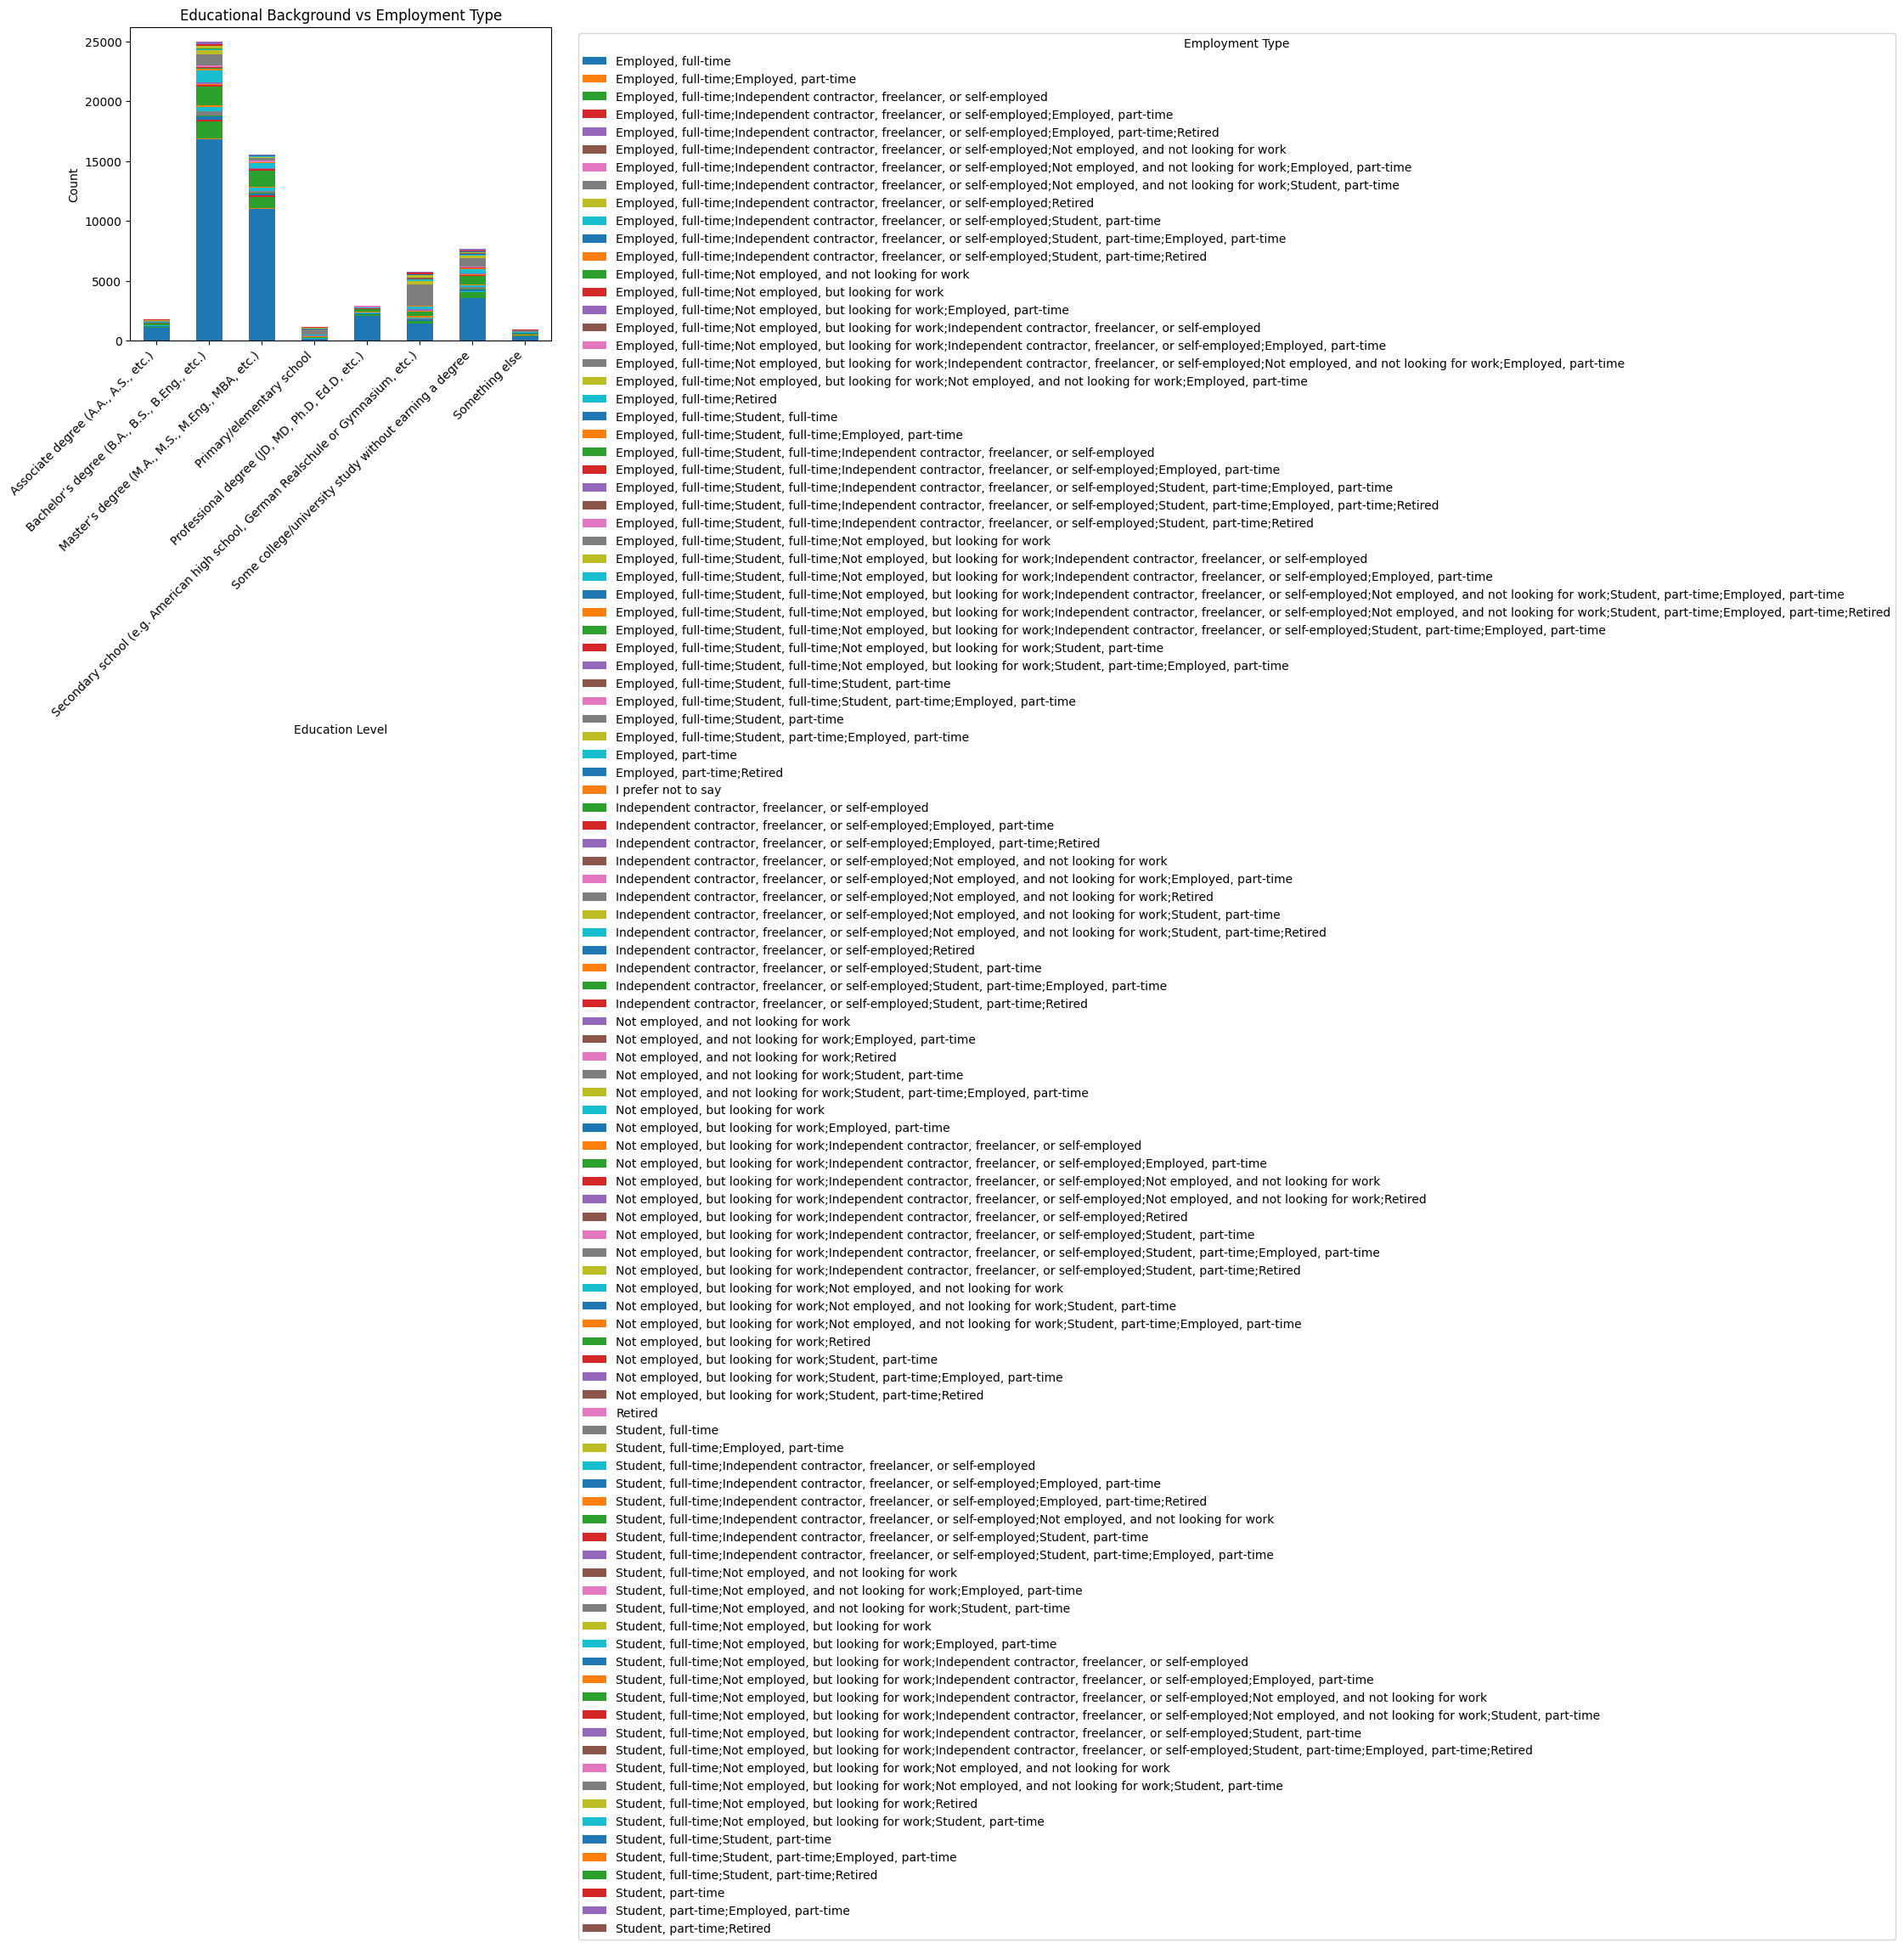

In [9]:
# Explore how educational background relates to employment type
if 'EdLevel' in df.columns and 'Employment' in df.columns:
    # Cross-tabulation
    print("Educational Background vs Employment Type:")
    ed_employment_crosstab = pd.crosstab(df['EdLevel'], df['Employment'], margins=True)
    print(ed_employment_crosstab)
    
    print("\n" + "="*60 + "\n")
    
    # Visualize with a stacked bar chart
    ed_employment_crosstab_no_margins = pd.crosstab(df['EdLevel'], df['Employment'])
    
    plt.figure(figsize=(14, 8))
    ed_employment_crosstab_no_margins.plot(kind='bar', stacked=True)
    plt.title('Educational Background vs Employment Type')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
